# Underfitting vs. Overfitting

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import  metrics

Rozważmy następujący zbiór punktów:

In [6]:
np.random.seed(0)
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

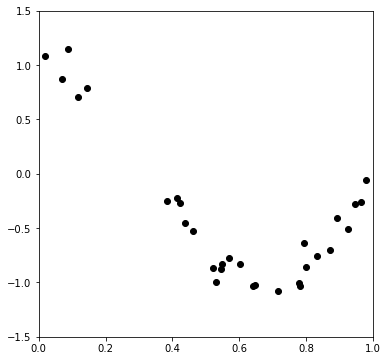

In [7]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X, y,  color='black')
x_tr = np.linspace(0, 1, 200)
plt.show()

Podziel dane na dwie grupy.

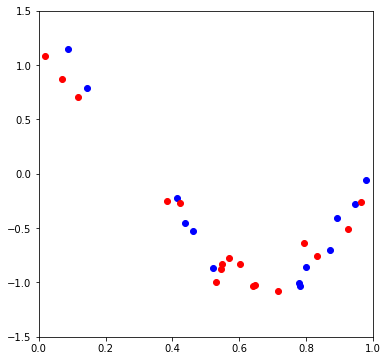

In [8]:
s=np.random.random_sample(n_samples)
s[s>0.5]=1
s[s<=0.5]=0
s
X1=X[s==1]
y1=y[s==1]
X2=X[s==0]
y2=y[s==0]

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x_tr = np.linspace(0, 1, 200)
plt.show()

# Zadanie
Wykonaj regresję:

* liniową
* wielomianową stopnia 20

w każdej z grup.

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import  metrics

0.5110514312446298
0.18163869287051138


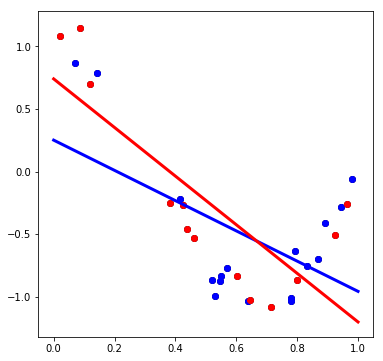

-7134944904323.548
-122075.84283125738


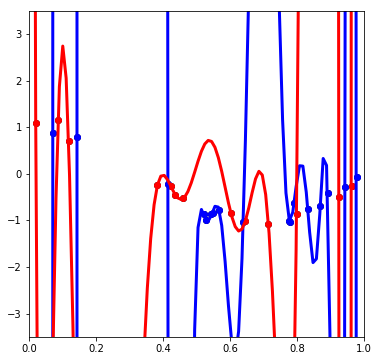

Coefficients: 
 [[-1.4406353]]


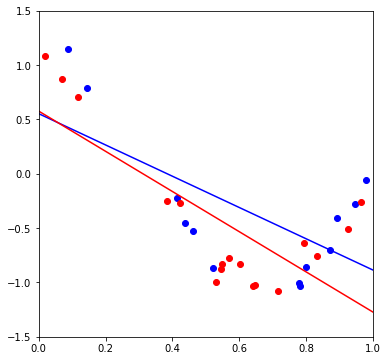

In [26]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 

# create linear regression object 
reg = linear_model.LinearRegression()
reg2 = linear_model.LinearRegression()

# train the model using the training sets
X1_T = X1.reshape(-1, 1)
y1_T = y1.reshape(-1, 1)
reg.fit(X1_T, y1_T)

X2_T = X2.reshape(-1, 1)
y2_T = y2.reshape(-1, 1)
reg2.fit(X2_T, y2_T)

print('Coefficients: \n', reg.coef_) 
# print('Variance score: {}'.format(reg.score(X1_T, y1_T))) 

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x_tr = np.linspace(0, 1, 200).reshape(-1, 1)
plt.plot(x_tr, reg.predict(x_tr), 'b')
plt.plot(x_tr, reg2.predict(x_tr), 'r')
plt.show()

In [24]:
x=X1
M = np.vstack( (np.ones_like(x), 
                x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10
                #,x**11, x**12, x**13, x**14, x**15, x**16, x**17, x**18, x**19, x**20
               ) ).T
p = np.linalg.lstsq(M, y1, rcond=None)

In [34]:
x=X2
M2 = np.vstack( (np.ones_like(x), 
                x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10
                ,x**11, x**12, x**13, x**14, x**15, x**16, x**17, x**18, x**19, x**20
               ) ).T
p2 = np.linalg.lstsq(M2, y2, rcond=None)

In [26]:
f_lr = lambda x: p[0][3]*pow(x, 3)+ p[0][2]*pow(x,2) + p[0][1] * x + p[0][0] +p[0][4]*pow(x,4)+p[0][5]*pow(x,5)+p[0][6]*pow(x,6)+p[0][7]*pow(x,7)+p[0][8]*pow(x,8)+p[0][9]*pow(x,9)+p[0][10]*pow(x,10)

In [35]:
f_lr2 = lambda x: p2[0][3]*pow(x, 3)+ p2[0][2]*pow(x,2) + p2[0][1] * x + p2[0][0] +p2[0][4]*pow(x,4)+p2[0][5]*pow(x,5)+p2[0][6]*pow(x,6)+p2[0][7]*pow(x,7)+p2[0][8]*pow(x,8)+p2[0][9]*pow(x,9)+p2[0][10]*pow(x,10)+p2[0][11]*pow(x,11)+p2[0][12]*pow(x,12)+p2[0][13]*pow(x,13)+p2[0][14]*pow(x,14)+p2[0][15]*pow(x,15)+p2[0][16]*pow(x,16)+p2[0][17]*pow(x,17)+p2[0][18]*pow(x,18)+p2[0][19]*pow(x,19)+p2[0][20]*pow(x,20)

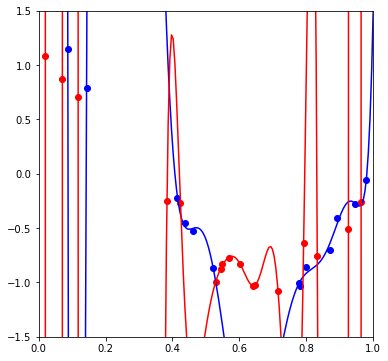

In [36]:
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x_tr = np.linspace(0, 1, 200).reshape(-1, 1)
plt.plot(x_tr, f_lr(x_tr), 'b')
plt.plot(x_tr, f_lr2(x_tr), 'r')
plt.show()

# Zadanie
Wykonaj 100 podziałów na dwie równe części. Za każdym razem naucz regresję:

* liniową
* wielomianową stopnia 1, 2, 3, 4, 5, 6

na jednym fragmęcie i policz R_square na drugim.
Zwizualizuj wynik.
